In [21]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt

In [22]:
limpios = pd.read_csv('Processed\processed.csv')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Sengan\AppData\Local\Temp\ipykernel_15420\1898509969.py:1: SyntaxWarning: invalid escape sequence '\p'
  limpios = pd.read_csv('Processed\processed.csv')


In [23]:
limpios.head()

,Share pledge ratio of controlling shareholders,Pledge ratio of unlimited shares,audit opinion,Downgrade or negative,Ratio of other receivables to total assets,ROA,Asset liability ratio,Pledge ratio of limited sale shares,ROE,Enterprise age,IsDefault
0,0.152395,0.126366,0.0,0.0,0.013032,0.046191,0.632901,0.000000,0.129841,11.258333,0
1,0.608351,0.159443,0.0,0.0,0.013802,0.121959,0.654380,0.014874,0.190550,9.166667,0
2,0.499388,0.153660,0.0,0.0,0.005863,0.015570,0.315073,0.000000,0.034949,10.175000,0
3,0.000000,0.001285,0.0,0.0,0.030776,0.164398,0.490227,0.000000,0.295278,16.494444,0
4,0.332566,0.014730,0.0,0.0,0.021106,0.229710,0.555522,0.232977,0.598016,9.391667,0


In [5]:
limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 11 columns):
 #   Column                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                   --------------  -----  
 0   Share pledge ratio of controlling shareholders                                                                                                           1435 non-null   float64
 1   Pledge ratio of unlimited shares                                                                                                                         1435 non-null   float64
 2   audit opinion                                                                                                                                            1435 no

In [5]:
limpios.describe()

,Share pledge ratio of controlling shareholders,Pledge ratio of unlimited shares,audit opinion,Downgrade or negative,Ratio of other receivables to total assets,ROA,Asset liability ratio,Pledge ratio of limited sale shares,ROE,Enterprise age,IsDefault
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,0.440492,0.108032,0.078746,0.018815,0.019935,0.054723,0.438565,0.024034,0.048677,9.836481,0.180488
std,0.344470,0.133721,0.360247,0.135920,0.036553,0.099951,0.215517,0.080303,0.291947,9.266917,0.384727
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.646738,0.010000,0.000000,-6.440000,0.000000,0.000000
25%,0.096166,0.000000,0.000000,0.000000,0.004045,0.026190,0.269863,0.000000,0.025792,4.043056,0.000000
50%,0.434688,0.054170,0.000000,0.000000,0.009005,0.053641,0.434211,0.000000,0.073784,7.600000,0.000000
75%,0.730736,0.185471,0.000000,0.000000,0.020160,0.094006,0.573491,0.000000,0.133751,13.497222,0.000000
max,1.000000,0.706297,2.000000,1.000000,0.418566,0.695737,1.740000,0.759900,1.880000,121.002778,1.000000


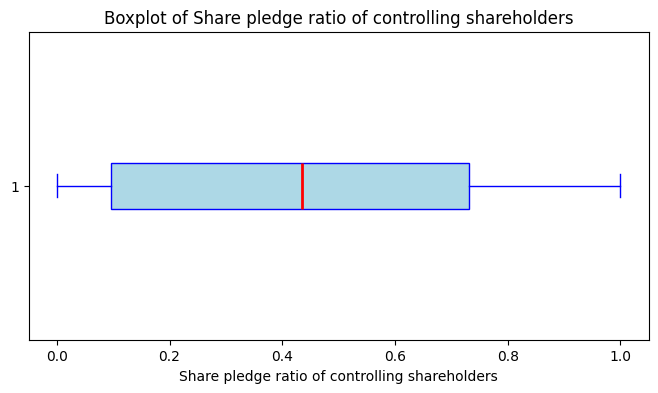

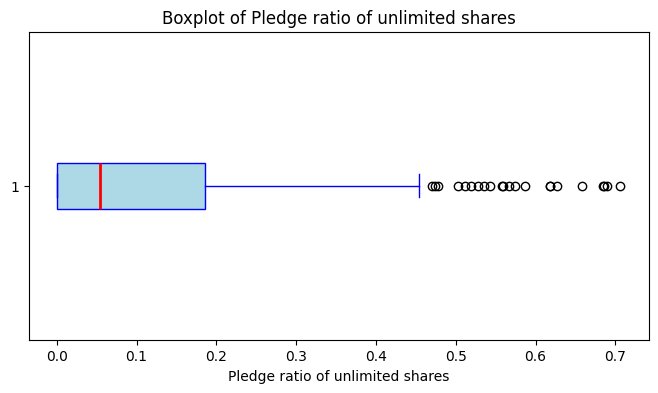

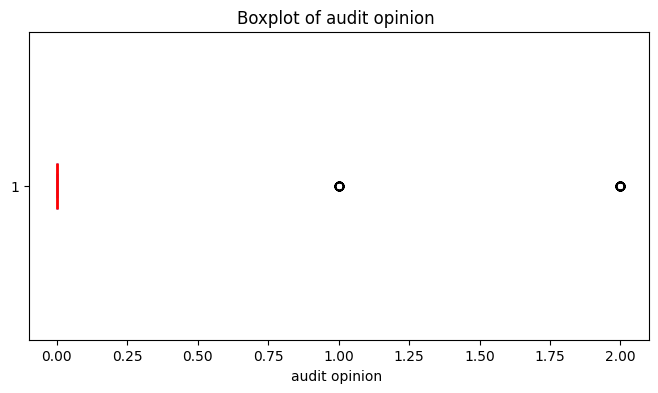

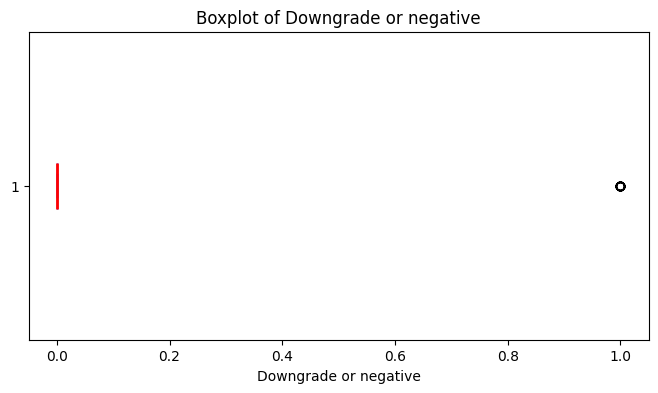

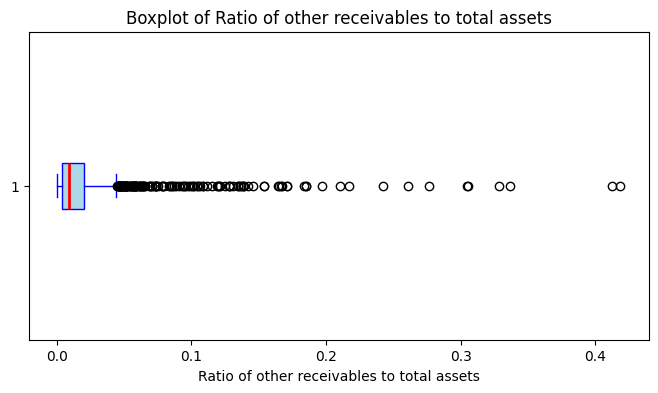

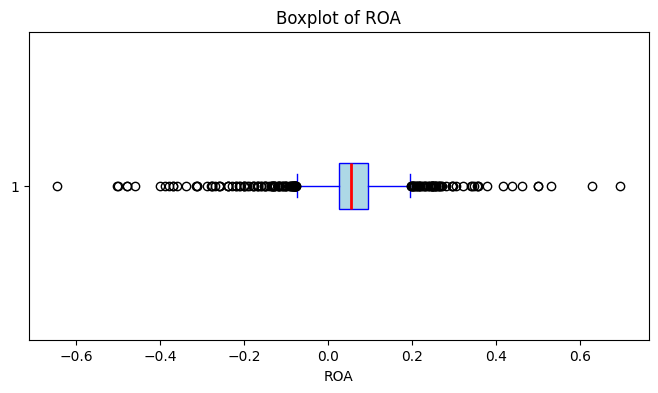

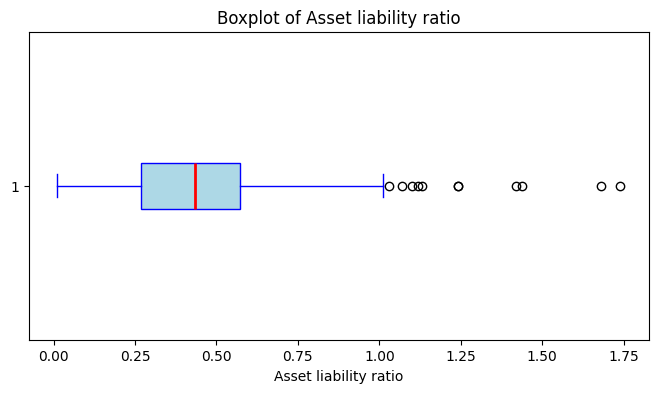

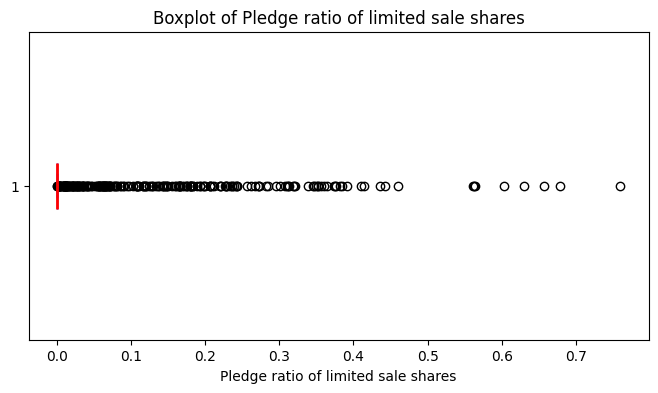

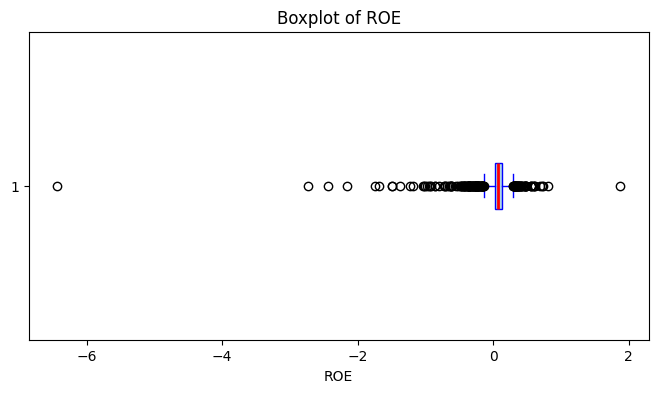

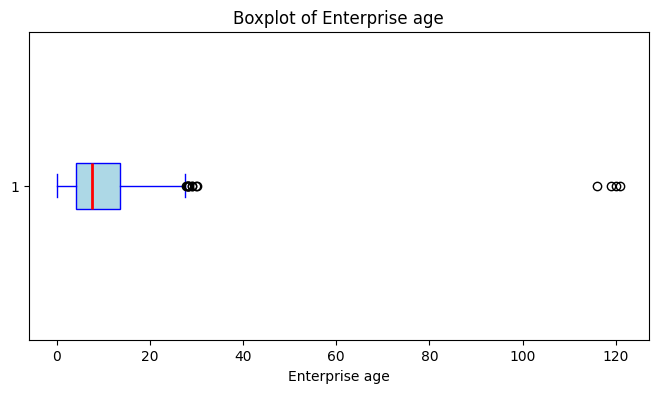

In [19]:
outliers_colorful_figures = []
for column in limpios.select_dtypes(include=['float64']):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.boxplot(limpios[column], vert=False, patch_artist=True, 
               boxprops=dict(facecolor="lightblue", color="blue"),
               whiskerprops=dict(color="blue"),
               capprops=dict(color="blue"),
               medianprops=dict(color="red", linewidth=2))
    ax.set_title(f"Boxplot of {column}", fontsize=12)
    ax.set_xlabel(column)
    outliers_colorful_figures.append(fig)

plt.show()

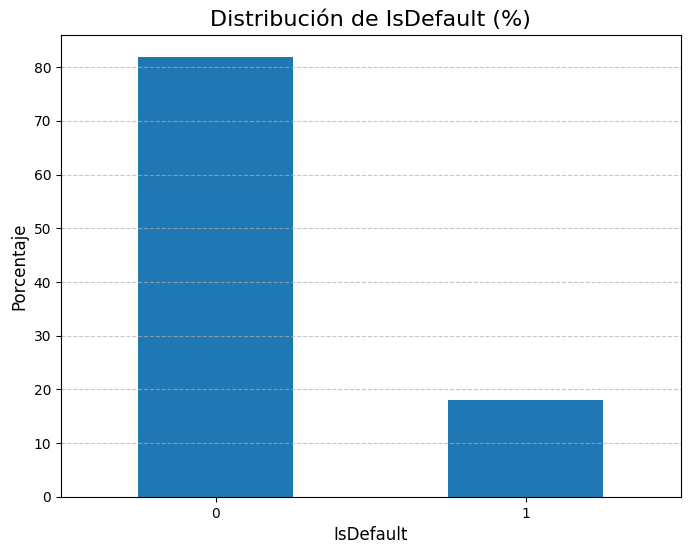

IsDefault
0    81.95122
1    18.04878
Name: proportion, dtype: float64

In [ ]:
isdefault_distribution = limpios['IsDefault'].value_counts(normalize=True) * 100

isdefault_distribution.plot(kind='bar', figsize=(8, 6))
plt.title('Distribución de IsDefault (%)', fontsize=16)
plt.xlabel('IsDefault', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

isdefault_distribution

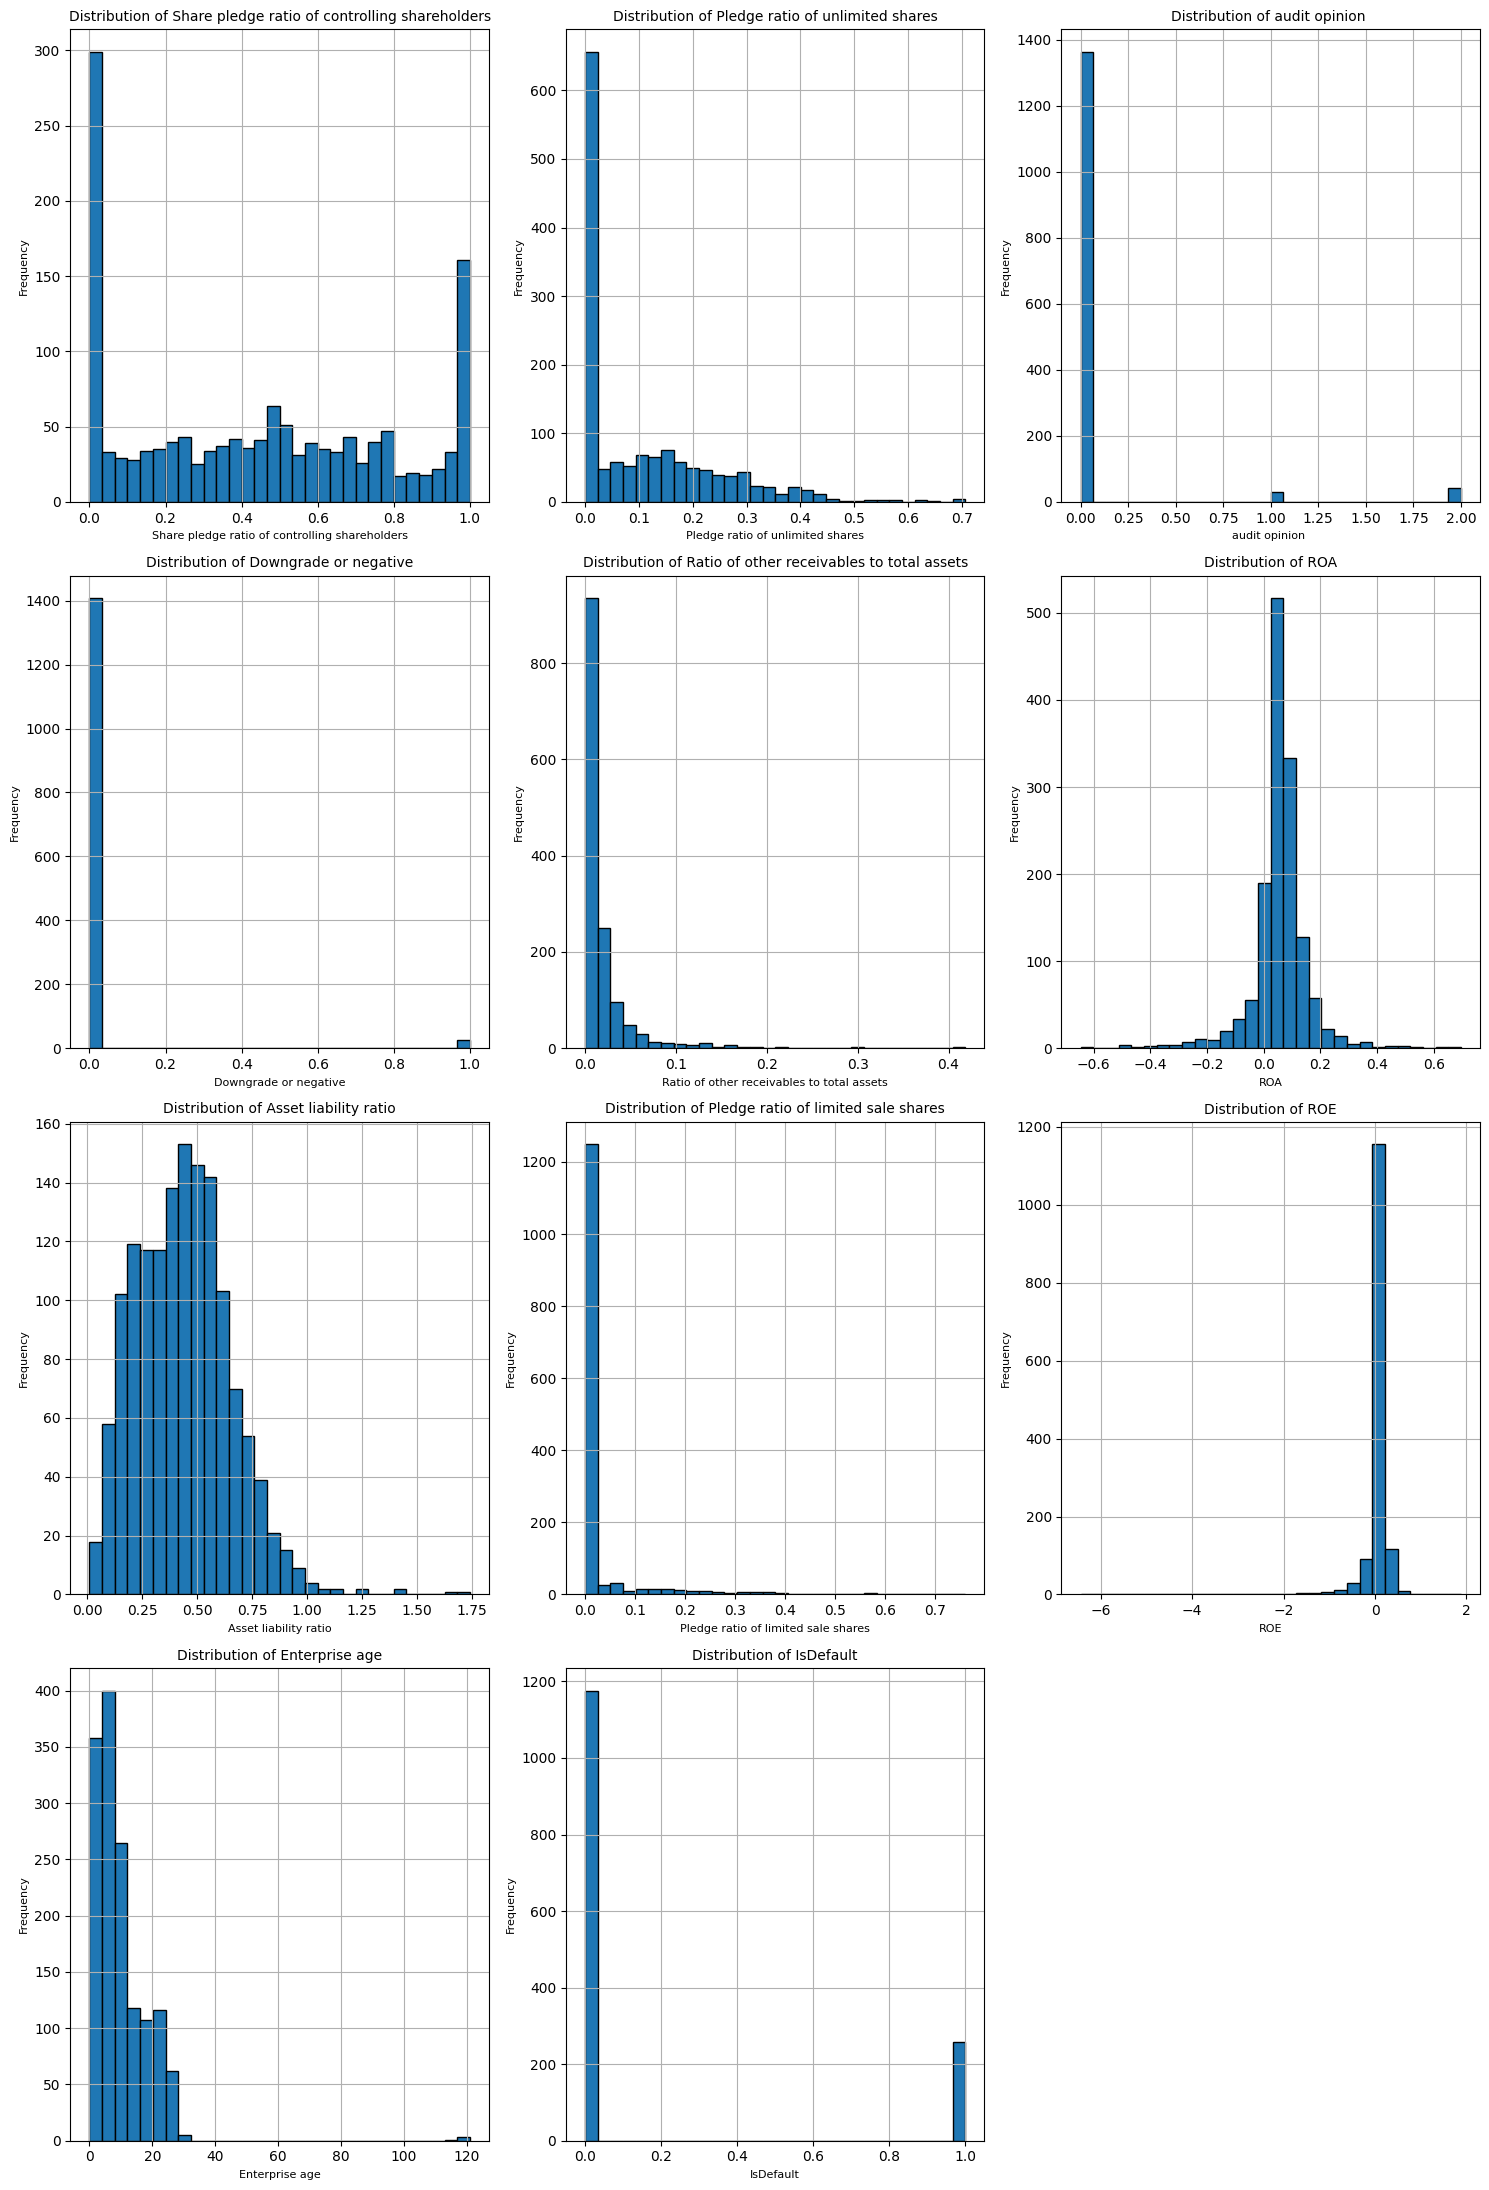

In [31]:
num_columns = limpios.select_dtypes(include="number").columns 
num_vars = len(num_columns)

plt.figure(figsize=(15, num_vars * 2))

for i, column in enumerate(num_columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    limpios[column].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}', fontsize=10)
    plt.xlabel(column, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

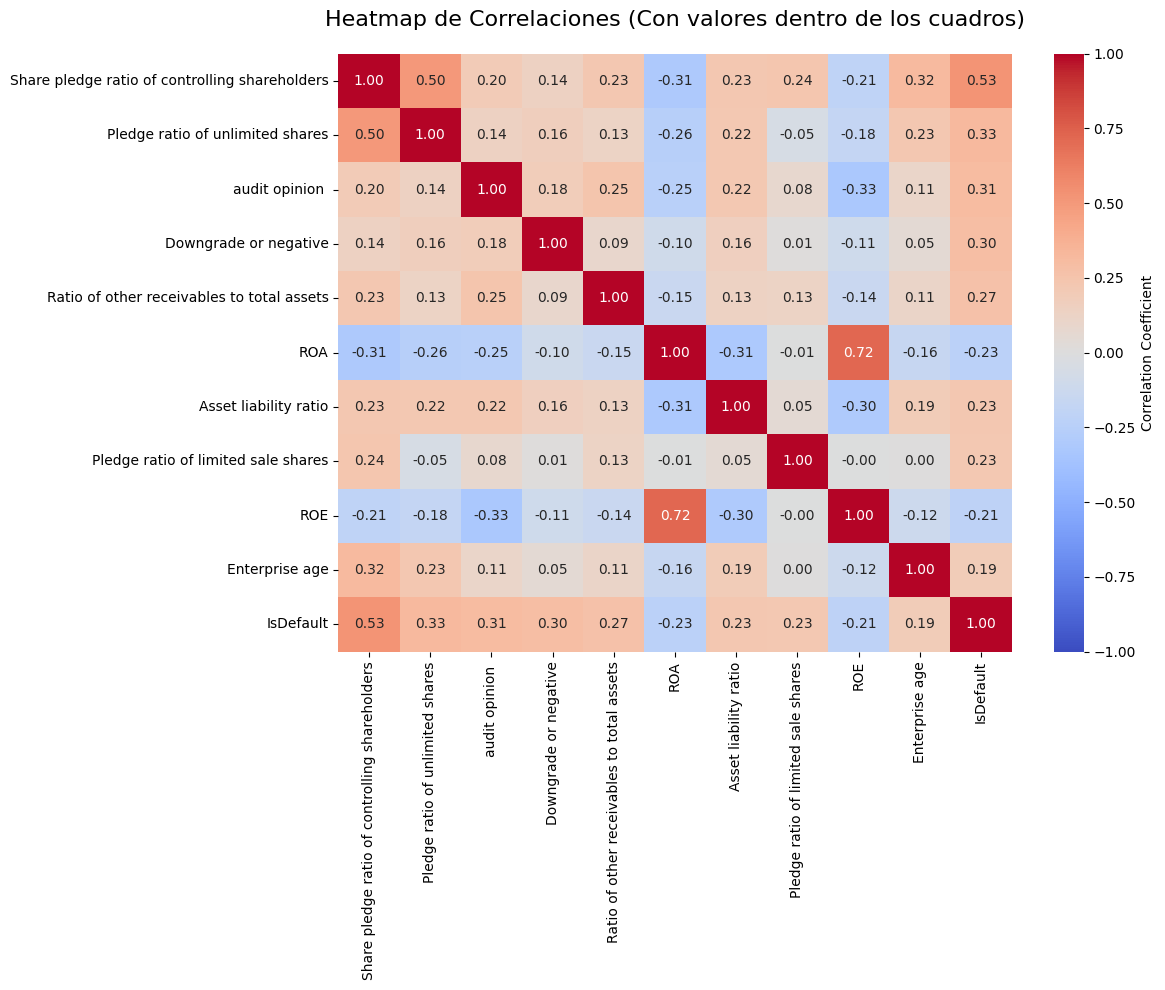

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(limpios.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Heatmap de Correlaciones (Con valores dentro de los cuadros)", fontsize=16, pad=20)  
plt.tight_layout()
plt.show()